# SIR information visualization

Here we implement the visualization of the number of different groups of pedestrians over time during simulation with `matplotlib`.  
The data is from the `SIRinformation.csv` file which is generated by the software Vadere.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

As there are always pedestrians missing at each time step (except the first time step) in the output files, we need to perform data cleaning first.

In [2]:
def data_processing(filename):
    """
    Process data generated by the Vadere and prepare for the visualization.
    Since there are always missing data at each time step except the first one,
    this function fills the missing data according to the data from previous time step.

    Args:
    filename: the name of the output csv file.

    Returns:
    num_groups:
        Numpy array of shape (3, number_of_all_time_steps).
        Each row represents the number of pedestrians from one group over time.
        E.g. row 0 represents the number of pedestrians from group 0, i.e. infected, over time.
    time_steps:
        Numpy array of the full time steps of the simulation.
    """
    data = pd.read_csv(filename, delimiter=" ")
    pedestrians = [pedestrian for (_, pedestrian) in data.groupby("pedestrianId")]
    full_time_set = set(data["simTime"])
    pds_full_array = np.zeros((len(full_time_set), 3))[None, :, :]

    for pedestrian in pedestrians:
        pds_array = pedestrian.to_numpy()
        missing_time_steps = full_time_set - set(pedestrian["simTime"])
        missing_time_array = np.array(list(missing_time_steps))
        dim = missing_time_array.shape[0]
        pds_ids = np.full(dim, list(pedestrian["pedestrianId"])[0])
        pds_groups = np.full(dim, np.NaN)
        temp = np.vstack((pds_ids, missing_time_array))
        missing_pds = np.concatenate((temp, pds_groups.reshape(1, -1)), axis=0)
        pds_full = np.concatenate((pds_array, missing_pds.T.reshape(-1, 3)), axis=0)
        sorted_indices = pds_full[:, 1].argsort()
        sorted_pds_full = pds_full[sorted_indices]
        pds_df = pd.DataFrame(sorted_pds_full, columns=['pedestrianId', 'simTime', 'groupId-PID5'])
        pds_full_array = np.concatenate((pds_full_array, pds_df.ffill().to_numpy()[None, :, :]), axis=0)

    groups = pds_full_array[1:, :, 2].T
    num_groups = (groups[None, :, :] == np.arange(3)[:, None, None]).sum(axis=-1)
    time_steps = np.sort(np.array(list(full_time_set)))

    return num_groups, time_steps

Then we define a function for visualization.

In [3]:
def plot_curves(a, b, title, x_label, y_label):
    """
    Plot curves based on the given arrays.

    Args:
    a: 1-d Numpy array of shape (number of full time steps,), represents full time steps;
    b: 2-d Numpy array of shape (3, number of full time steps), represents SIR group number over time, the output of data_processing;
    title: String, the title of the figure;
    x_label: String, the name of x axis;
    y_label: String, the name of y axis;
    """
    plt.plot(a, b[0], 'r', label='Infected')
    plt.plot(a, b[1], 'b', label='Susceptible')
    plt.plot(a, b[2], 'g', label='Recovered')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.show()

In the following, we will create figures to illustrate the number of pedestrians from different groups over time for different scenarios.

### scenario 1

Settings:  
  * canvas size = 50*50 (the size of the white part)  
  * source size = 30*30  
  * target size = 40*40
  * number of pedestrians = 1000  
  * "org.vadere.state.attributes.models.AttributesSIRG" : {  
      "infectionsAtStart" : 10,  
      "infectionRate" : 0.01,  
      "recoveryRate" : 0.01,  
      "infectionMaxDistance" : 1.0  
    },  

We copy the output file into this directory and rename it to `SIRinformation1.csv`.


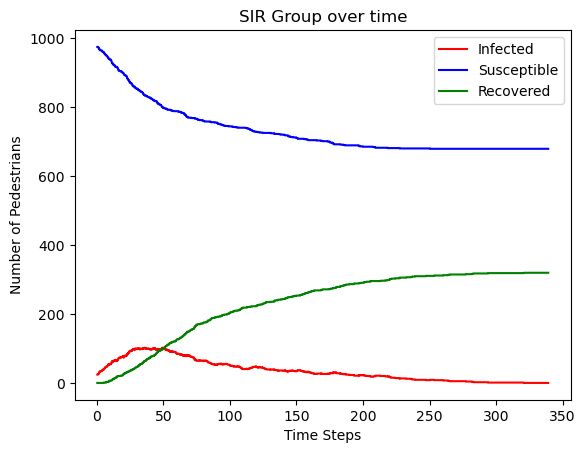

In [4]:
num_groups, time_steps = data_processing("SIRinformation1.csv")
plot_curves(time_steps, num_groups, 'SIR Group over time', 'Time Steps', 'Number of Pedestrians')

### scenario 2

Settings:  
  * canvas size = 40*40 (the size of the white part)  
  * source size = 20*20  
  * target size = 30*30
  * number of pedestrians = 1000  
  * "org.vadere.state.attributes.models.AttributesSIRG" : {  
      "infectionsAtStart" : 10,  
      "infectionRate" : 0.01,  
      "recoveryRate" : 0.01,  
      "infectionMaxDistance" : 1.0  
    },  

We copy the output file into this directory and rename it to `SIRinformation2.csv`.


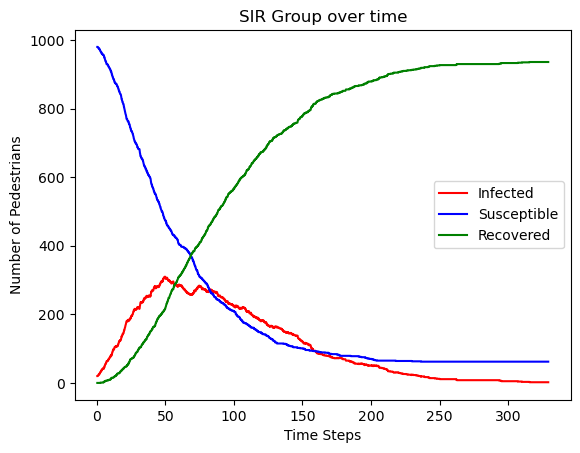

In [5]:
num_groups, time_steps = data_processing("SIRinformation2.csv")
plot_curves(time_steps, num_groups, 'SIR Group over time', 'Time Steps', 'Number of Pedestrians')

### scenario 3

Settings:  
  * canvas size = 50*50 (the size of the white part)  
  * source size = 30*30  
  * target size = 40*40
  * number of pedestrians = 1000  
  * "org.vadere.state.attributes.models.AttributesSIRG" : {  
      "infectionsAtStart" : 10,  
      "infectionRate" : 0.1,  
      "recoveryRate" : 0.01,  
      "infectionMaxDistance" : 1.0  
    },  

We copy the output file into this directory and rename it to `SIRinformation3.csv`.


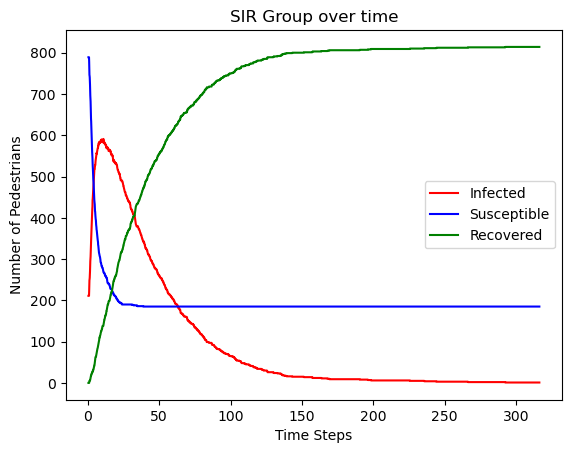

In [6]:
num_groups, time_steps = data_processing("SIRinformation3.csv")
plot_curves(time_steps, num_groups, 'SIR Group over time', 'Time Steps', 'Number of Pedestrians')

### scenario 4

Settings:  
  * canvas size = 50*50 (the size of the white part)  
  * source size = 30*30  
  * target size = 40*40
  * number of pedestrians = 1000  
  * "org.vadere.state.attributes.models.AttributesSIRG" : {  
      "infectionsAtStart" : 10,  
      "infectionRate" : 0.01,  
      "recoveryRate" : 0.1,  
      "infectionMaxDistance" : 1.0  
    },  

We copy the output file into this directory and rename it to `SIRinformation4.csv`.


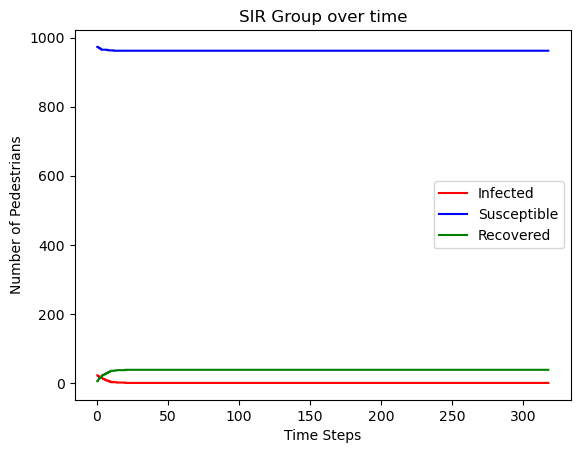

In [7]:
num_groups, time_steps = data_processing("SIRinformation4.csv")
plot_curves(time_steps, num_groups, 'SIR Group over time', 'Time Steps', 'Number of Pedestrians')

### scenario 5

Settings:  
  * canvas size = 50*50 (the size of the white part)  
  * source size = 30*30  
  * target size = 40*40
  * number of pedestrians = 1000  
  * "org.vadere.state.attributes.models.AttributesSIRG" : {  
      "infectionsAtStart" : 10,  
      "infectionRate" : 0.1,  
      "recoveryRate" : 0.1,  
      "infectionMaxDistance" : 1.0  
    },  

We copy the output file into this directory and rename it to `SIRinformation5.csv`.


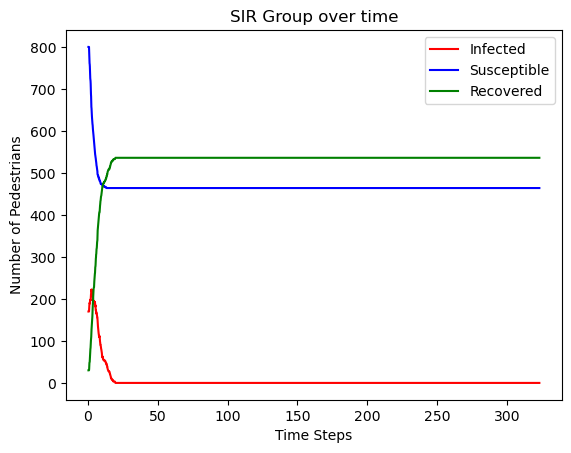

In [8]:
num_groups, time_steps = data_processing("SIRinformation5.csv")
plot_curves(time_steps, num_groups, 'SIR Group over time', 'Time Steps', 'Number of Pedestrians')